## Install and Import Dependencies

In [48]:
pip install numpy tensorflow matplotlib seaborn

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, ResNet101, Xception
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize

## Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### Normalization of Pixel Values

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train.shape

(60000, 28, 28)

#### Converting y to Categorical encoding

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
y_train.shape

(60000, 10)

## Custom Architecture of CNN

#### Architecture

In [7]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#### Configuration

In [8]:
cnn_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

#### Training

In [9]:
cnn_history = cnn_model.fit(X_train, y_train,
                            epochs = 20,
                            validation_data = (X_test, y_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6833 - loss: 0.8439 - val_accuracy: 0.8228 - val_loss: 0.4700
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8260 - loss: 0.4663 - val_accuracy: 0.8556 - val_loss: 0.3869
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8552 - loss: 0.3920 - val_accuracy: 0.8600 - val_loss: 0.3852
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8666 - loss: 0.3587 - val_accuracy: 0.8736 - val_loss: 0.3363
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8740 - loss: 0.3385 - val_accuracy: 0.8753 - val_loss: 0.3293
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8774 - loss: 0.3289 - val_accuracy: 0.8810 - val_loss: 0.3202
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8873 - loss: 0.3066 - val_accuracy: 0.8853 - val_loss: 0.3135
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8873 - loss: 0.298

#### Evaluation

In [10]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print('Test Loss of CNN      :', cnn_loss)
print('Test Accuracy of CNN  :', cnn_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8963 - loss: 0.3061
Test Loss of CNN      : 0.29179954528808594
Test Accuracy of CNN  : 0.8952999711036682


In [63]:
cnn_model.save('CNN_Fashion_MNIST.keras')

## Xception Model

In [12]:
X_train.shape

(60000, 28, 28)

#### Transformning data to make it compatible with Xception Model

In [13]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [14]:
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))

In [15]:
target_size = (99, 99)
X_train = tf.image.resize(X_train, target_size)
X_test = tf.image.resize(X_test, target_size)

In [16]:
X_train.shape

TensorShape([60000, 99, 99, 3])


#### Loading Pretrained Model with imagenet weights

In [11]:
xception = Xception(include_top = False,
                    weights = 'imagenet',
                    input_shape = (99, 99, 3))

#### Architecture

In [17]:
xception_model = Sequential([
    xception,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#### Configuration

In [18]:
xception_model.compile(optimizer = 'adam',
                       loss = 'categorical_crossentropy',
                       metrics = ['accuracy'])

#### Training

In [19]:
xception_history = xception_model.fit(X_train, y_train,
                                      epochs = 10,
                                      batch_size = 32,
                                      validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 233s 102ms/step - accuracy: 0.8094 - loss: 0.5823 - val_accuracy: 0.9085 - val_loss: 0.2577
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 238s 98ms/step - accuracy: 0.9280 - loss: 0.2139 - val_accuracy: 0.9044 - val_loss: 0.2765
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 99ms/step - accuracy: 0.9377 - loss: 0.1866 - val_accuracy: 0.8974 - val_loss: 0.2780
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 100ms/step - accuracy: 0.9500 - loss: 0.1457 - val_accuracy: 0.9359 - val_loss: 0.1954
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 98ms/step - accuracy: 0.9518 - loss: 0.1492 - val_accuracy: 0.9361 - val_loss: 0.1974
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 98ms/step - accuracy: 0.9630 - loss: 0.1104 - val_accuracy: 0.9200 - val_loss: 0.2441
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 98ms/step - accuracy: 0.9684 - loss: 0.0969 - val_accuracy: 0.8771 - val_loss: 0.3456
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 98ms/step - accuracy

#### Evaluation

In [20]:
xception_loss, xception_acc = xception_model.evaluate(X_test, y_test)
print('Test Loss of Xception      :', xception_loss)
print('Test Accuracy of Xception  :', xception_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9443 - loss: 0.2036
Test Loss of Xception      : 0.21248279511928558
Test Accuracy of Xception  : 0.9417999982833862


In [64]:
xception_model.save('Xception_Fashion_MNIST.keras')

## VGG16

#### Loading Pretrained Model with imagenet weights

In [22]:
vgg16 = VGG16(include_top = False,
              weights = 'imagenet',
              input_shape = (99, 99, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### Architecture

In [23]:
vgg_model = Sequential([
    vgg16,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#### Configuration

In [24]:
vgg_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

#### Training

In [25]:
vgg_history = vgg_model.fit(X_train, y_train,
                            epochs = 10,
                            batch_size = 32,
                            validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 133ms/step - accuracy: 0.6390 - loss: 1.1278 - val_accuracy: 0.8655 - val_loss: 0.3580
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 245s 130ms/step - accuracy: 0.8774 - loss: 0.3368 - val_accuracy: 0.8837 - val_loss: 0.3062
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 268s 133ms/step - accuracy: 0.8913 - loss: 0.2897 - val_accuracy: 0.8917 - val_loss: 0.2940
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 254s 129ms/step - accuracy: 0.9014 - loss: 0.2610 - val_accuracy: 0.8962 - val_loss: 0.2815
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 129ms/step - accuracy: 0.9140 - loss: 0.2314 - val_accuracy: 0.9046 - val_loss: 0.2615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 269s 133ms/step - accuracy: 0.9197 - loss: 0.2153 - val_accuracy: 0.9033 - val_loss: 0.2583
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 133ms/step - accuracy: 0.9196 - loss: 0.2127 - val_accuracy: 0.9057 - val_loss: 0.2516
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 133ms/step - ac

#### Evaluation

In [26]:
vgg_loss, vgg_acc = vgg_model.evaluate(X_test, y_test)
print('Test Loss of VGG16      :', vgg_loss)
print('Test Accuracy of VGG16  :', vgg_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9127 - loss: 0.2439
Test Loss of VGG16      : 0.23853595554828644
Test Accuracy of VGG16  : 0.9144999980926514


In [65]:
vgg_model.save('VGG16_Fashion_MNIST.keras')

## Comparative Analysis

#### Visualization

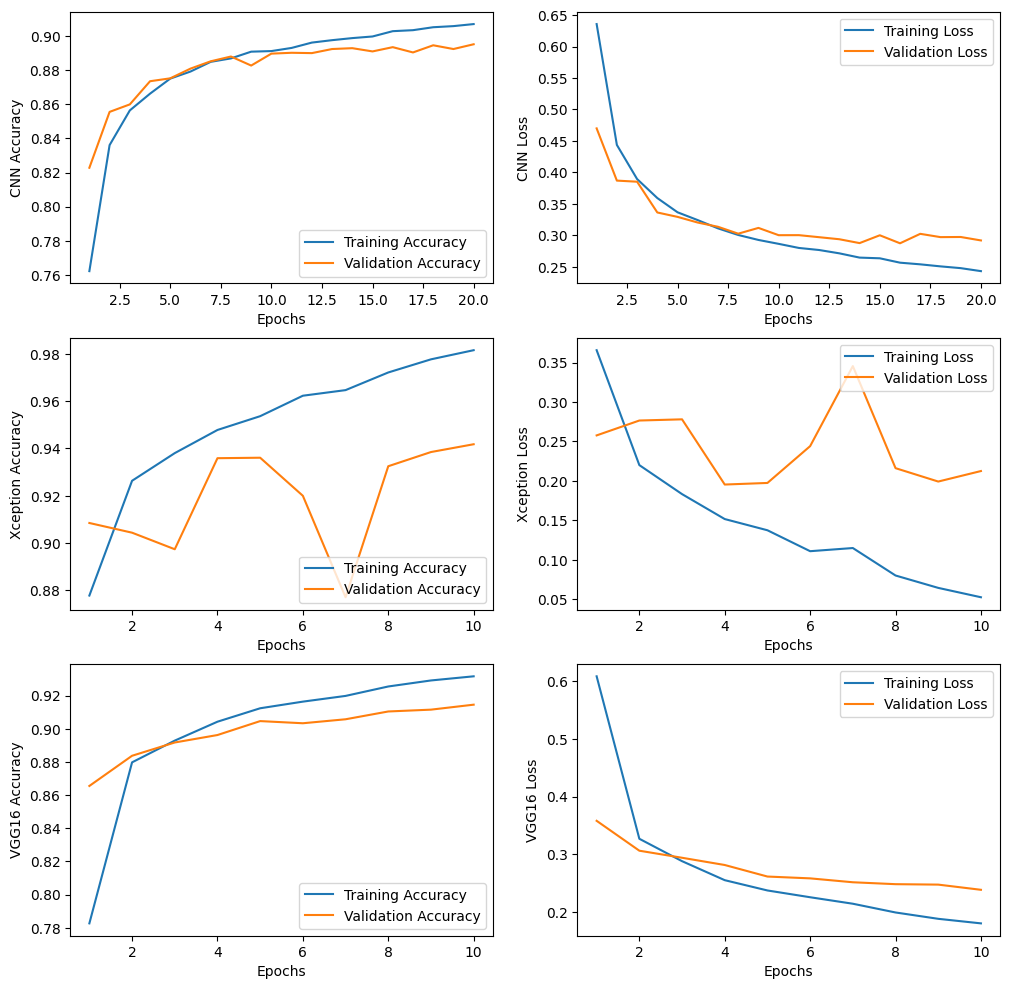

In [55]:
plt.figure(figsize = (12, 12))

plt.subplot(3, 2, 1)
sns.lineplot(x = np.arange(1, 21), y = cnn_history.history['accuracy'], label = 'Training Accuracy')
sns.lineplot(x = np.arange(1, 21), y = cnn_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('CNN Accuracy')
plt.legend(loc = 'lower right')
plt.subplot(3, 2, 2)
sns.lineplot(x = np.arange(1, 21), y = cnn_history.history['loss'], label = 'Training Loss')
sns.lineplot(x = np.arange(1, 21), y = cnn_history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('CNN Loss')
plt.legend(loc = 'upper right')

plt.subplot(3, 2, 3)
sns.lineplot(x = np.arange(1, 11), y = xception_history.history['accuracy'], label = 'Training Accuracy')
sns.lineplot(x = np.arange(1, 11), y = xception_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Xception Accuracy')
plt.legend(loc = 'lower right')
plt.subplot(3, 2, 4)
sns.lineplot(x = np.arange(1, 11), y = xception_history.history['loss'], label = 'Training Loss')
sns.lineplot(x = np.arange(1, 11), y = xception_history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Xception Loss')
plt.legend(loc = 'upper right')

plt.subplot(3, 2, 5)
sns.lineplot(x = np.arange(1, 11), y = vgg_history.history['accuracy'], label = 'Training Accuracy')
sns.lineplot(x = np.arange(1, 11), y = vgg_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('VGG16 Accuracy')
plt.legend(loc = 'lower right')
plt.subplot(3, 2, 6)
sns.lineplot(x = np.arange(1, 11), y = vgg_history.history['loss'], label = 'Training Loss')
sns.lineplot(x = np.arange(1, 11), y = vgg_history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('VGG16 Loss')
plt.legend(loc = 'upper right')

plt.show()

In [61]:
print('Test Loss of CNN           :', cnn_loss)
print('Test Accuracy of CNN       :', cnn_acc)
print('*' * 50)

print('Test Loss of Xception      :', xception_loss)
print('Test Accuracy of Xception  :', xception_acc)
print('*' * 50)

print('Test Loss of VGG16         :', vgg_loss)
print('Test Accuracy of VGG16     :', vgg_acc)
print('*' * 50)

Test Loss of CNN           : 0.29179954528808594
Test Accuracy of CNN       : 0.8952999711036682
**************************************************
Test Loss of Xception      : 0.21248279511928558
Test Accuracy of Xception  : 0.9417999982833862
**************************************************
Test Loss of VGG16         : 0.23853595554828644
Test Accuracy of VGG16     : 0.9144999980926514
**************************************************


###### Xception Model is Performning Better | Higher Accuracy | Lesser Loss